In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
from epistasis.models import EpistasisPowerTransform
from epistasis.models.power import power_transform
from epistasis.sampling import BayesianSampler
from epistasis.simulate import NonlinearSimulation

In [136]:
sim = NonlinearSimulation.from_length(4, function=power_transform, p0=[-1,0,10])
sim.set_coefs_order(2)
sim.set_coefs_random((-.1,.1))
sim.epistasis.values[0] = 3
sim.build()
sim.set_stdeviations(0.5)

In [137]:
sim.phenotypes

0     15.466097
1     15.423793
2     16.168686
3     15.787496
4     15.863296
5     15.951730
6     16.227501
7     15.982405
8     15.873657
9     16.214616
10    16.123978
11    16.128966
12    15.831690
13    16.277618
14    15.828193
15    15.955545
dtype: float64

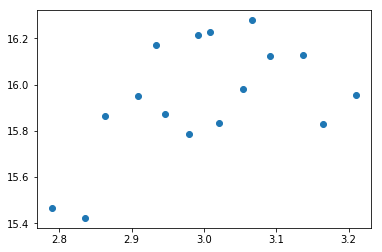

In [138]:
plt.plot(sim.phenotypes, sim.phenotypes, 'o')

In [135]:
model = EpistasisPowerTransform.from_gpm(sim, order=3, lmbda=.1, A=2, B=-10)
model.fit()

RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

In [41]:
model.score()

(0.80948040330504323, 1.0)

In [42]:
model.score?

Signature: model.score(X=None, y=None)
Docstring:
Calculates the squared-pearson coefficient for the nonlinear fit.

Returns two r-squared values, linear-portion and nonlinear portion.
File:      ~/Documents/Research/projects/pkgs/epistasis/epistasis/models/nonlinear.py
Type:      method


In [23]:
s = BayesianSampler(model)

In [24]:
s.add_samples(10000)

In [25]:
import corner

In [35]:
s.coefs.shape

(9988, 11)

In [36]:
len(sim.parameters.values + list(sim.epistasis.values))

10

IndexError: list index out of range

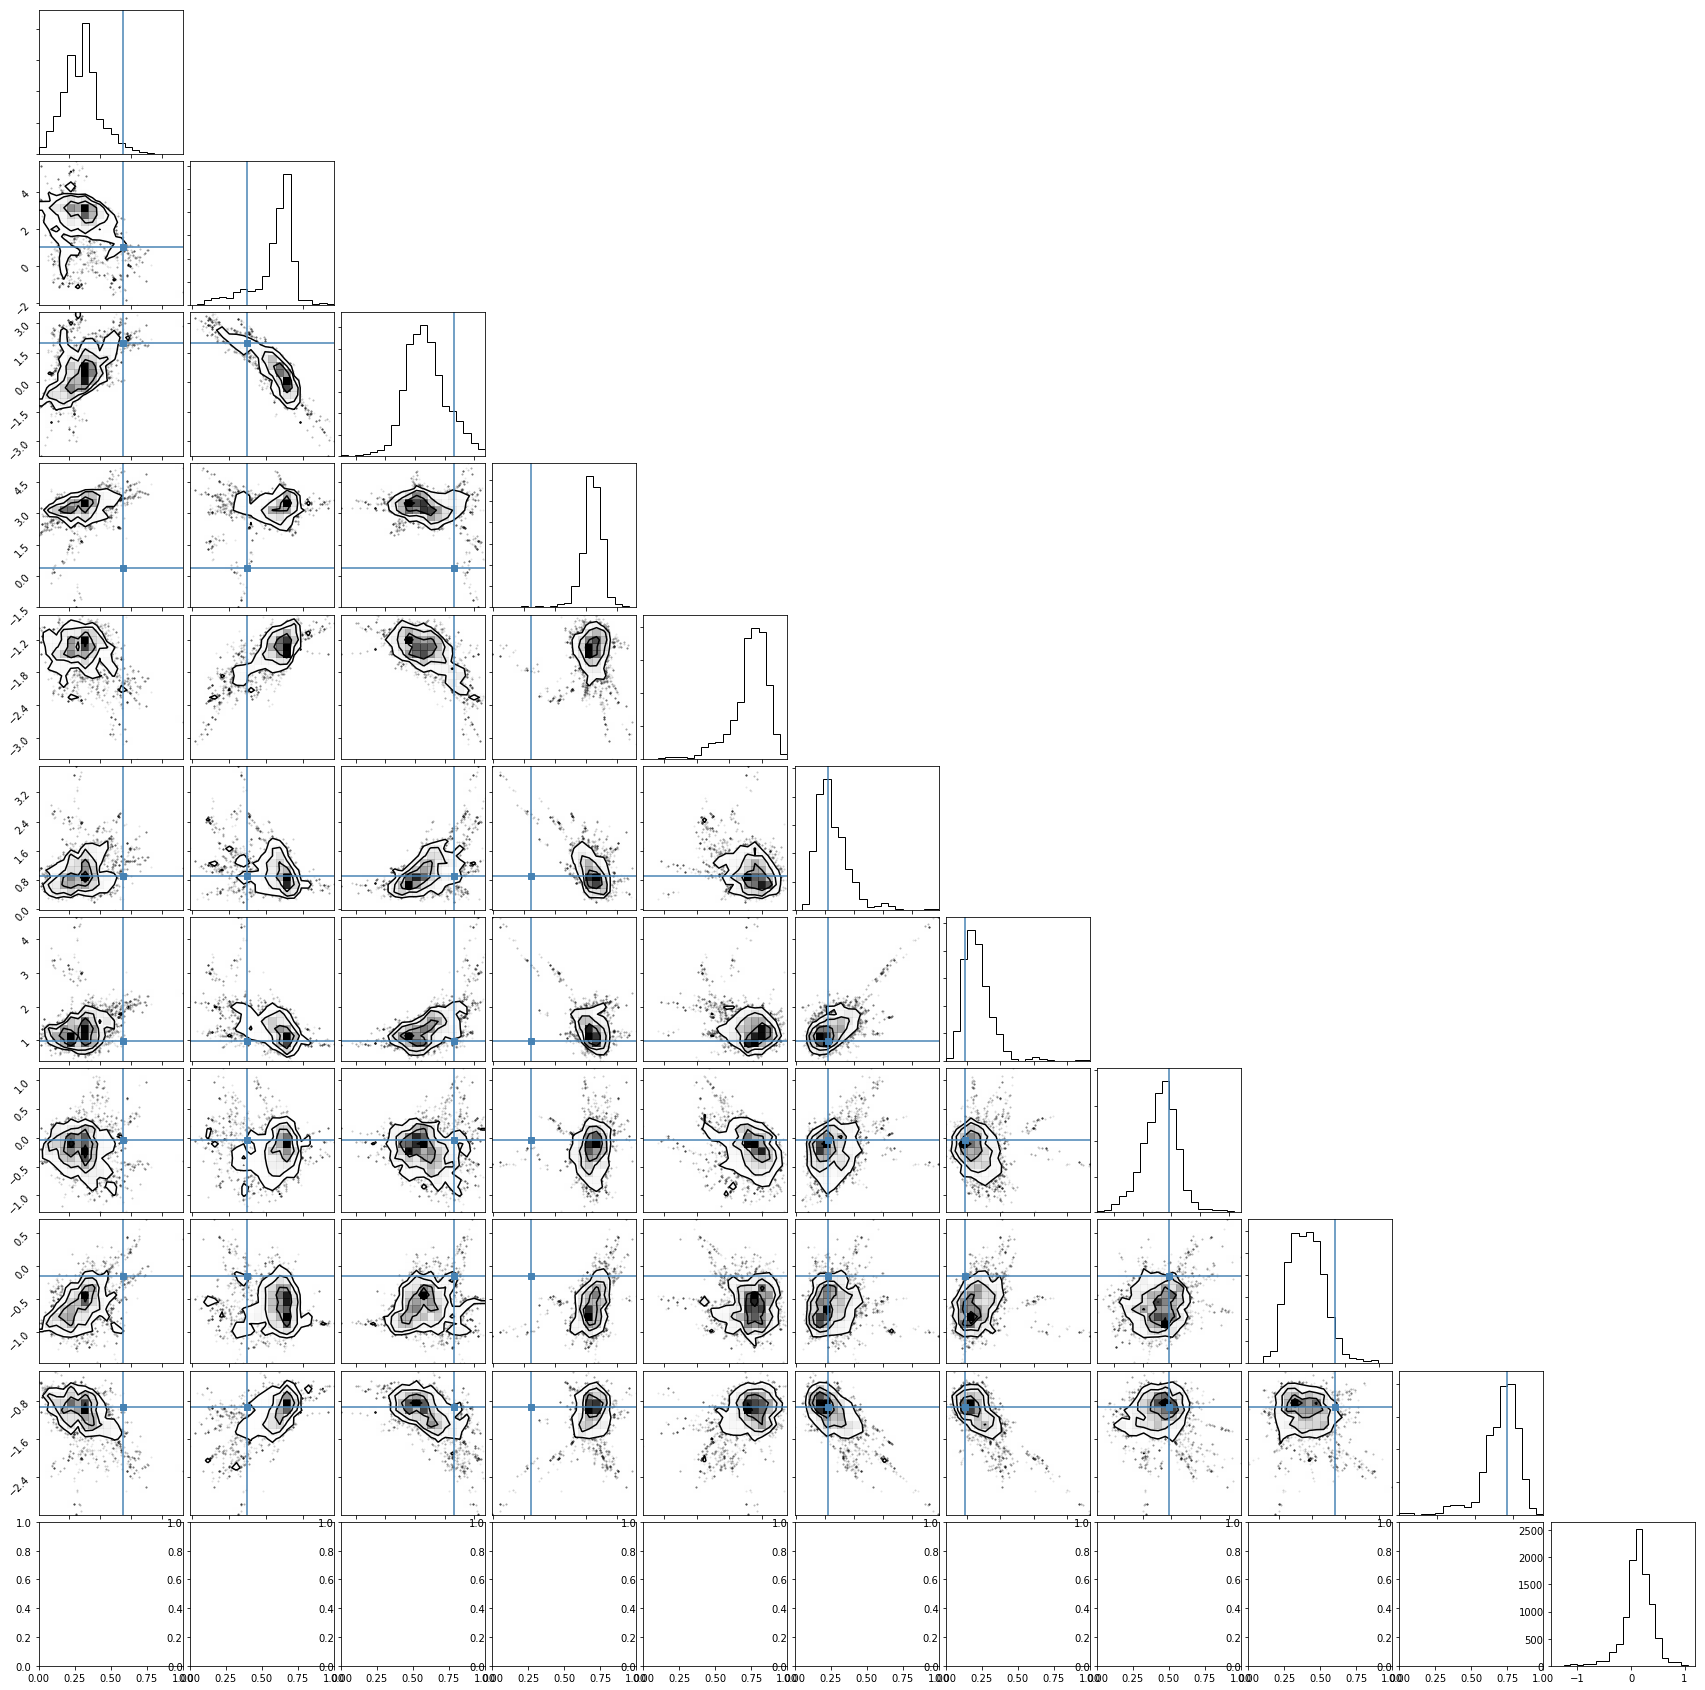

In [32]:
fig = corner.corner(s.coefs, truths=sim.parameters.values + list(sim.epistasis.values))

In [33]:
s.coefs

array([[ 2.11486912,  3.08809376,  0.62075716, ..., -0.47053933,
        -0.89404476,  0.09892394],
       [ 2.12004662,  3.14278626,  0.4551059 , ..., -0.41860518,
        -0.92458117,  0.05726497],
       [ 2.12004662,  3.14278626,  0.4551059 , ..., -0.41860518,
        -0.92458117,  0.05726497],
       ..., 
       [ 1.40068078,  2.17948079,  0.10548409, ..., -0.62960309,
        -1.12391973,  0.15349716],
       [ 1.40068078,  2.17948079,  0.10548409, ..., -0.62960309,
        -1.12391973,  0.15349716],
       [ 1.25121403,  2.57131505, -0.16516905, ..., -0.64396977,
        -1.19224143,  0.12991746]], dtype=float32)